In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from IPython.display import clear_output

In [9]:
# without numba this is very slow
@jit(nopython=True)
def count_arround(field):
#     setup a empty list to save the new state of each cell into
    results_list = []
#     store the shape of the field
    rows, cols = field.shape
#     this is the search area, used for both X and Y
    search_area = [-1, 0, 1]
#     set a counter to track the current row
    row_count = 0
#     loop over each row
    for row in field:
#        track the column number
        column_count = 0
#         loop over each column (cell) in each row
        for cell in row:
#            track the number of alive neighbors for each cell
            neighbors = 0
#            loop over, one row above, current row then below
            for relative_row_pos in search_area:
#                define the absolute row value
                abs_row = row_count+relative_row_pos
#                 if row is -1 (above the top of the array) then,
#                 reference the bottom of the areay instead
#                 this removed any edges from the array
                if abs_row == -1:
                    abs_row = rows-1
#                 do the same for the bottom
                if abs_row == rows:
                    abs_row = 0
#                 loop over left column, center then right
                for relative_col_pos in search_area:
#                     dont check then center pixel as it is not a neighbors
                    if not (relative_row_pos == 0 and relative_col_pos == 0):
#                         define the absolute possition to check
                        abs_col = column_count+relative_col_pos
#                         same as above but for left and right
                        if abs_col == -1:
                            abs_col = cols-1
                        if abs_col == cols:
                            abs_col = 0
#                         define the final location to check
                        check_loc = (abs_row, abs_col)
#                         check the location and count it if True
                        if field[check_loc]:
                            neighbors += 1
#             impliment the rules
            if cell:
#                 rule 1 underpopulation
                if neighbors < 2:
                    new_value = 0
#                 rule 2 next generation
                if 2 <= neighbors <= 3:
                    new_value = 1
#                 rule 3 overpopulation
                else:
                    new_value = 0
            else:
#                 rule 4 reproduction
                if neighbors == 3:
                    new_value = 1
                else:
                    new_value = 0
#             store the result
            results_list.append(new_value)
#             increment both columns and rows
            column_count += 1
        row_count += 1
#     convert listing into array then reshape to match input
    new_field = np.reshape(np.array(results_list), field.shape)

    return new_field

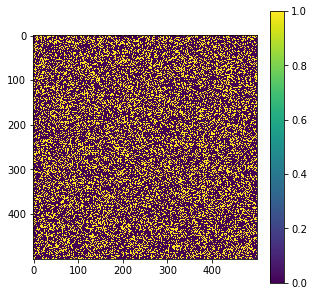

In [18]:
# generate a random starting array
# percentage of pixels that start off 'alive'
alive_pct = 0.3
field_size = 500
# build random array
field = np.random.uniform(low=0.0, high=1.0,
                          size = [field_size, field_size]) < alive_pct
# display array
plt.figure(figsize = (5, 5))
plt.imshow(field, interpolation='none')
plt.colorbar()

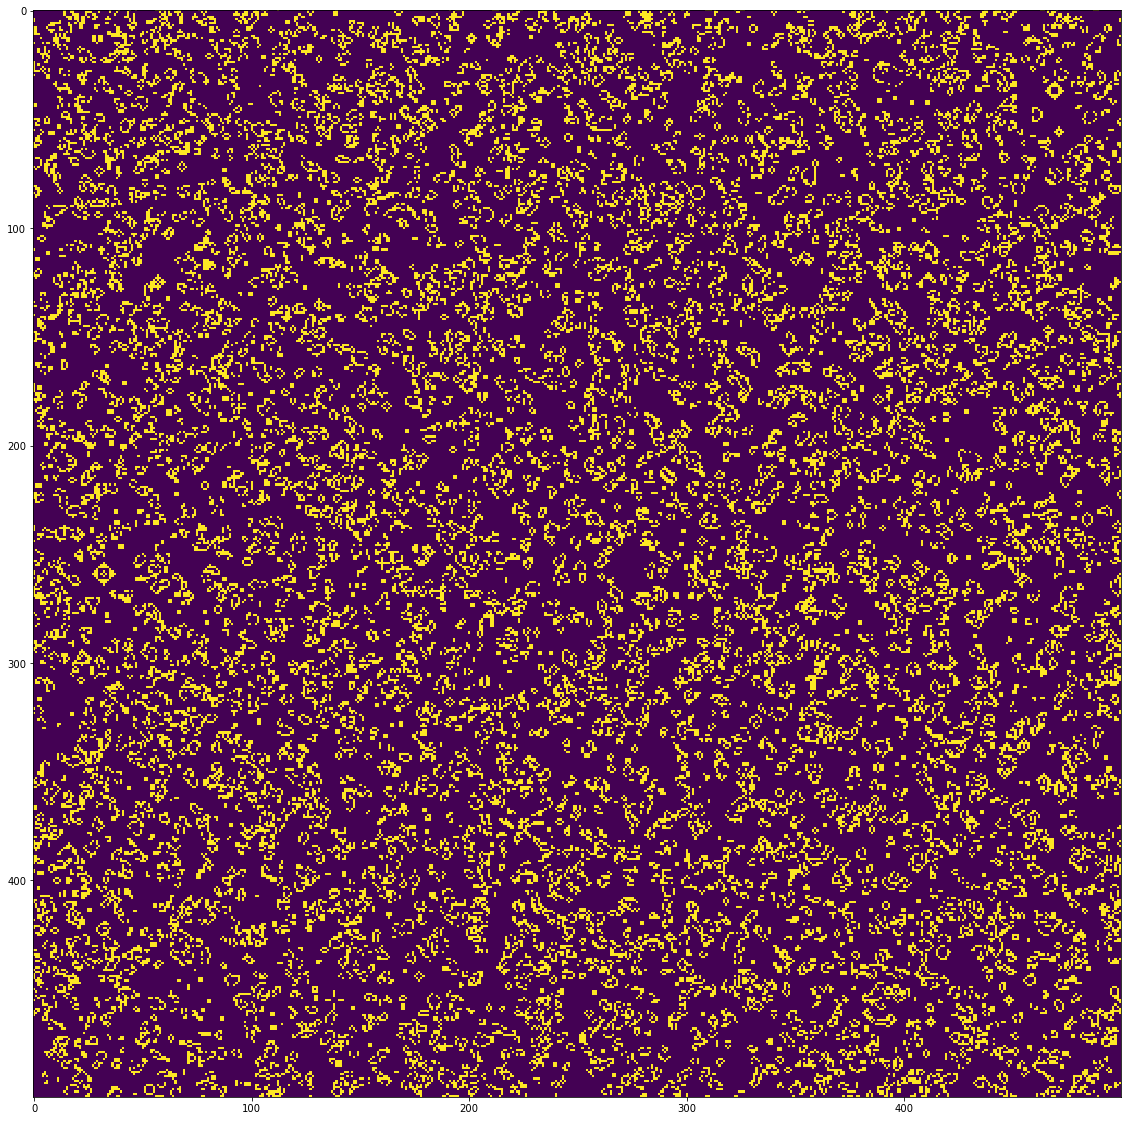

In [26]:
for i in range(0, 5):
    clear_output(wait=True)
    field = count_arround(field)
    plt.figure(figsize = (20, 20))
    plt.imshow(field, interpolation='none')
    plt.show()

In [28]:
%%time
for i in range(0,80):
    field = count_arround(field)

CPU times: user 295 ms, sys: 0 ns, total: 295 ms
Wall time: 295 ms


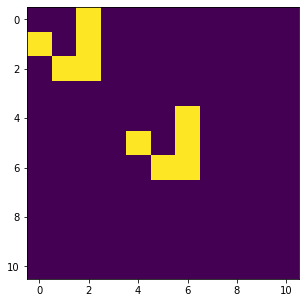

In [25]:
gliders = np.array([[0,0,1,0,0,0,0,0,0,0,0],
                  [1,0,1,0,0,0,0,0,0,0,0],
                  [0,1,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,1,0,1,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0]])

plt.figure(figsize = (5, 5))
plt.imshow(gliders, interpolation='none')

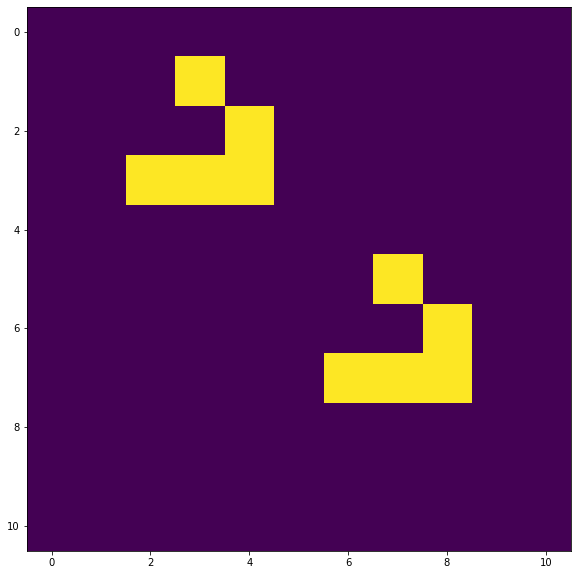

In [30]:
for i in range(0, 50):
    clear_output(wait=True)
    gliders = count_arround(gliders)
    plt.figure(figsize = (10, 10))
    plt.imshow(gliders, interpolation='none')
    plt.show()